In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Problem Statement:
- Analyze the factors affecting salaries in data-related roles across different countries, experience levels, and job titles.



In [3]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\ds_jobs.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# DATA CLEANING

In [4]:
df.shape

(607, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
df = df.drop(columns = ["Unnamed: 0"])

**Drop unwanted and unimportant column**

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**Observation**
- no null values in dataset

In [11]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Observation**
- All datatypes are in correct format

In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
continous = ['salary', 'salary_in_usd']

In [14]:
discrete_categorical = ['experience_level','employment_type', 'job_title', 'salary_currency',
                      'employee_residence', 'company_location',  ]

In [15]:
discrete_count = ['work_year', 'remote_ratio', 'company_size']

**Observation**
- categorize the data into continous, discrete_categorical, discrete_count 

**QUE: checking salary Data**
- Validate that salary_in_usd is correctly calculated.

In [16]:
df[["salary", "salary_in_usd"]]

,salary,salary_in_usd
0,70000,79833
1,260000,260000
2,85000,109024
3,20000,20000
4,150000,150000
...,...,...
602,154000,154000
603,126000,126000
604,129000,129000
605,150000,150000


In [17]:
unique_currencies = df['salary_currency'].unique()
print(unique_currencies)


['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']


**Observation**
- unique values of salary currencies

In [18]:
# exchange rates : convert salary from different currencies to usd
# STEP 1

exchange_rates = {
    "EUR": 1.14,  # 1 EUR = 1.14 USD
    "GBP": 1.28,  # 1 GBP = 1.28 USD
    "USD": 1.0,   # 1 USD = 1.0 USD
    "HUF": 0.0032,  # 1 HUF = 0.0032 
    "INR": 0.012,   # 1 INR = 0.012 
    "JPY": 0.0073,  # 1 JPY = 0.0073 
    "CNY": 0.15,    # 1 CNY = 0.15 
    "MXN": 0.055,   # 1 MXN = 0.055 
    "CAD": 0.75,    # 1 CAD = 0.75 
    "DKK": 0.16,    # 1 DKK = 0.16 
    "PLN": 0.26,    # 1 PLN = 0.26
    "SGD": 0.74,    # 1 SGD = 0.74 
    "CLP": 0.0012,  # 1 CLP = 0.0012 
    "BRL": 0.18,    # 1 BRL = 0.18 
    "TRY": 0.05,    # 1 TRY = 0.05 
    "AUD": 0.65,    # 1 AUD = 0.65
    "CHF": 1.08     # 1 CHF = 1.08 
}


**Observation**
- exchange rates : convert salary from different currencies to usd

In [19]:
# before step 2 check that given salary is correctly written or not 
# Manually calculate salary_in_usd based on salary and salary_currency

df['manual_salary_in_usd'] = df['salary'] * df['salary_currency'].map(exchange_rates)

# Compare manual_salary_in_usd and actual salary_in_usd columns

df['salary_in_usd_check'] = df['salary_in_usd'] == df['manual_salary_in_usd']
df[['salary', 'salary_currency', 'salary_in_usd', 'manual_salary_in_usd', 'salary_in_usd_check']]


,salary,salary_currency,salary_in_usd,manual_salary_in_usd,salary_in_usd_check
0,70000,EUR,79833,79800.0,False
1,260000,USD,260000,260000.0,True
2,85000,GBP,109024,108800.0,False
3,20000,USD,20000,20000.0,True
4,150000,USD,150000,150000.0,True
...,...,...,...,...,...
602,154000,USD,154000,154000.0,True
603,126000,USD,126000,126000.0,True
604,129000,USD,129000,129000.0,True
605,150000,USD,150000,150000.0,True


In [20]:
# STEP 2 
# Assuming you have a DataFrame 'df' with 'salary' and 'salary_currency' columns
# This will multiply each salary by its corresponding exchange rate from the salary_currency column, giving the salary in USD.

df['salary_in_usd'] = df['salary'] * df['salary_currency'].map(exchange_rates)


**Observation**
-  This will multiply each salary by its corresponding exchange rate from the salary_currency column, giving the salary in USD.


In [21]:
print(df[['salary', 'salary_currency', 'salary_in_usd']].head())

   salary salary_currency  salary_in_usd
0   70000             EUR        79800.0
1  260000             USD       260000.0
2   85000             GBP       108800.0
3   20000             USD        20000.0
4  150000             USD       150000.0


In [22]:
# Compare the calculated salary_in_usd and actual salary_in_usd columns are same or not

df['salary_in_usd_check'] = df['salary_in_usd'] == df['manual_salary_in_usd']
df[['salary', 'salary_currency', 'salary_in_usd', 'manual_salary_in_usd', 'salary_in_usd_check']]


,salary,salary_currency,salary_in_usd,manual_salary_in_usd,salary_in_usd_check
0,70000,EUR,79800.0,79800.0,True
1,260000,USD,260000.0,260000.0,True
2,85000,GBP,108800.0,108800.0,True
3,20000,USD,20000.0,20000.0,True
4,150000,USD,150000.0,150000.0,True
...,...,...,...,...,...
602,154000,USD,154000.0,154000.0,True
603,126000,USD,126000.0,126000.0,True
604,129000,USD,129000.0,129000.0,True
605,150000,USD,150000.0,150000.0,True


**Observation**
- Comparing the calculated salary_in_usd and actual salary_in_usd columns are same or not and after performing operation its showing result all True


In [23]:
# Drop the original salary and salary_currency columns if you only need salary_in_usd

df.drop(columns=['salary', 'salary_currency', 'manual_salary_in_usd' ,'salary_in_usd_check'], inplace=True)

In [24]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79800.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000.0,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,108800.0,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000.0,US,100,US,M
603,2022,SE,FT,Data Engineer,126000.0,US,100,US,M
604,2022,SE,FT,Data Analyst,129000.0,US,0,US,M
605,2022,SE,FT,Data Analyst,150000.0,US,100,US,M


**check outliers**

In [25]:
df["salary_in_usd"].skew()

1.6551683753421558

In [26]:
# Calculate Q1, Q3, and IQR
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
outliers


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Director of Data Science,325000.0,US,100,US,L
33,2020,MI,FT,Research Scientist,450000.0,US,0,US,M
63,2020,SE,FT,Data Scientist,412000.0,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000.0,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000.0,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000.0,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,600000.0,US,100,US,L
482,2022,EX,FT,Data Engineer,324000.0,US,100,US,M
519,2022,SE,FT,Applied Data Scientist,380000.0,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000.0,US,100,US,L


In [27]:
# Apply square root transformation

df['salary_in_usd_sqrt'] = np.sqrt(df['salary_in_usd'])

print("Skewness before transformation:", df['salary_in_usd'].skew())
print("Skewness after square root transformation:", df['salary_in_usd_sqrt'].skew())



Skewness before transformation: 1.6551683753421558
Skewness after square root transformation: 0.16700552653194042


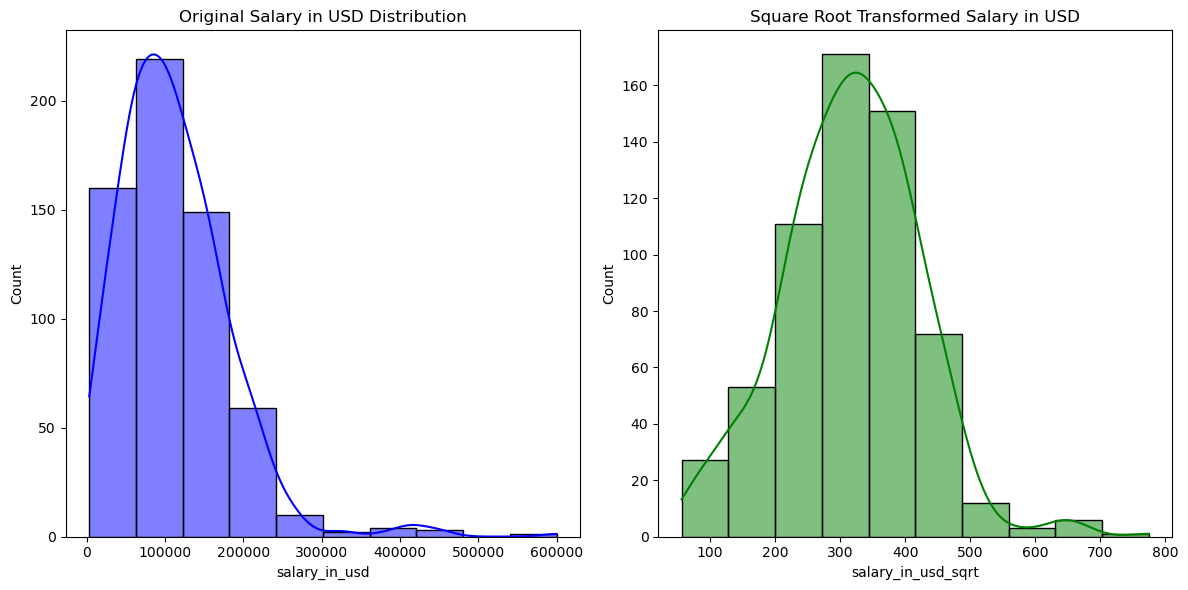

In [42]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, color='blue', bins=10)
plt.title('Original Salary in USD Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['salary_in_usd_sqrt'], kde=True, color='green', bins=10)
plt.title('Square Root Transformed Salary in USD')


plt.tight_layout()
plt.show()

**Observation**

- Original Distribution (Before Transformation):

- - The histogram might show a right-skewed distribution, where most of the salary values are clustered at the lower end, and there is a long tail extending towards the higher salary values.
- - This kind of distribution is common with salary data, where a few people earn extremely high salaries compared to the majority.
- - The KDE (Kernel Density Estimate) line may highlight the skewness in the distribution, showing a peak on the left and a gradual tail towards the right.
Transformed Distribution (After Square Root Transformation):

- After applying the square root transformation, you might notice that the distribution has become less skewed.
- - The histogram could appear more symmetrical, especially if the original data was highly right-skewed.
- - The tail towards the higher salaries might have been compressed, making it easier to analyze salary data for both high and low earners.

In [45]:
df = df.drop(columns = "salary_in_usd_sqrt")

In [46]:
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

# ANALYSIS

In [30]:
df['salary_in_usd'].describe()

count       607.000000
mean     111614.936580
std       71294.852663
min        3190.000000
25%       61370.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

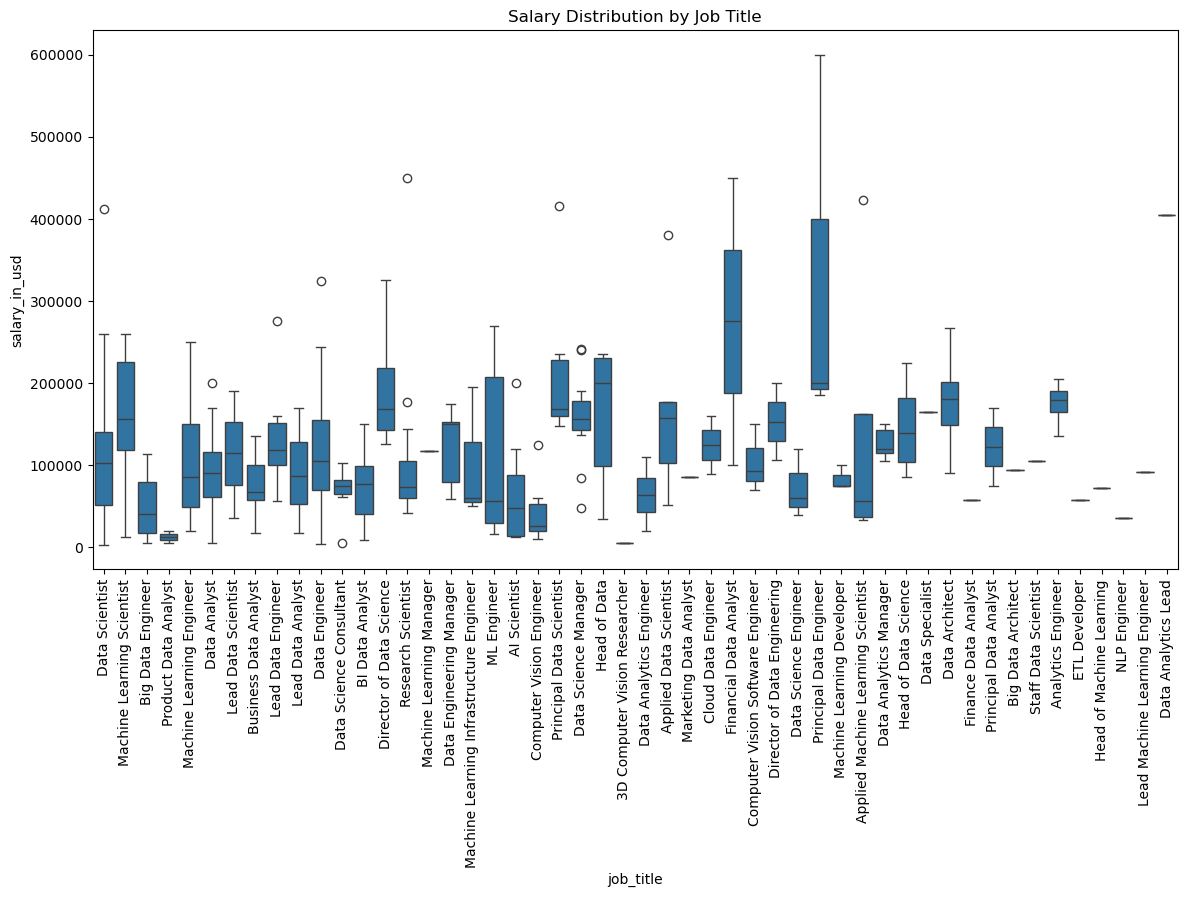

In [31]:
# Salary Distribution by Job Title

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Salary Distribution by Job Title')
plt.show()

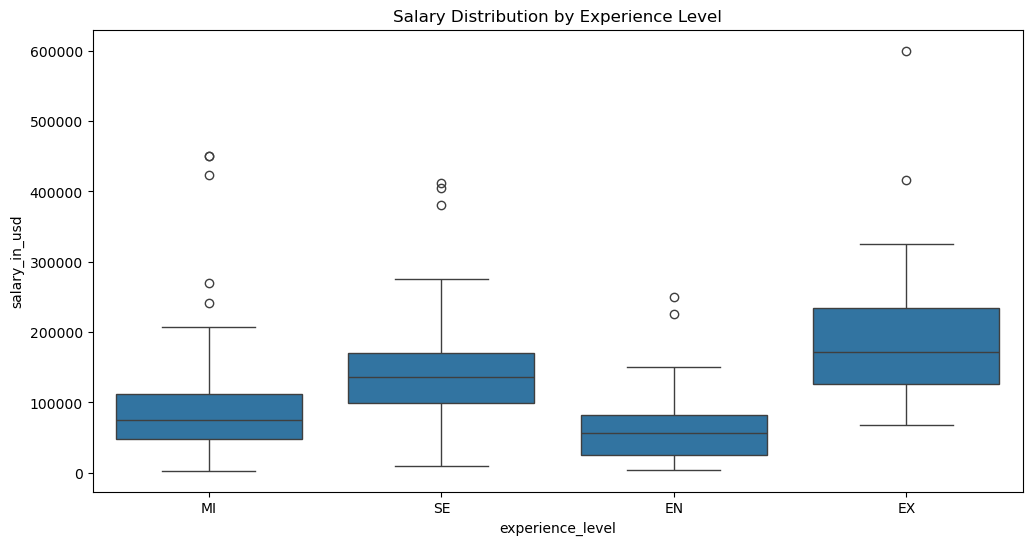

In [32]:
# Salary Distribution by Experience Level

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.show()


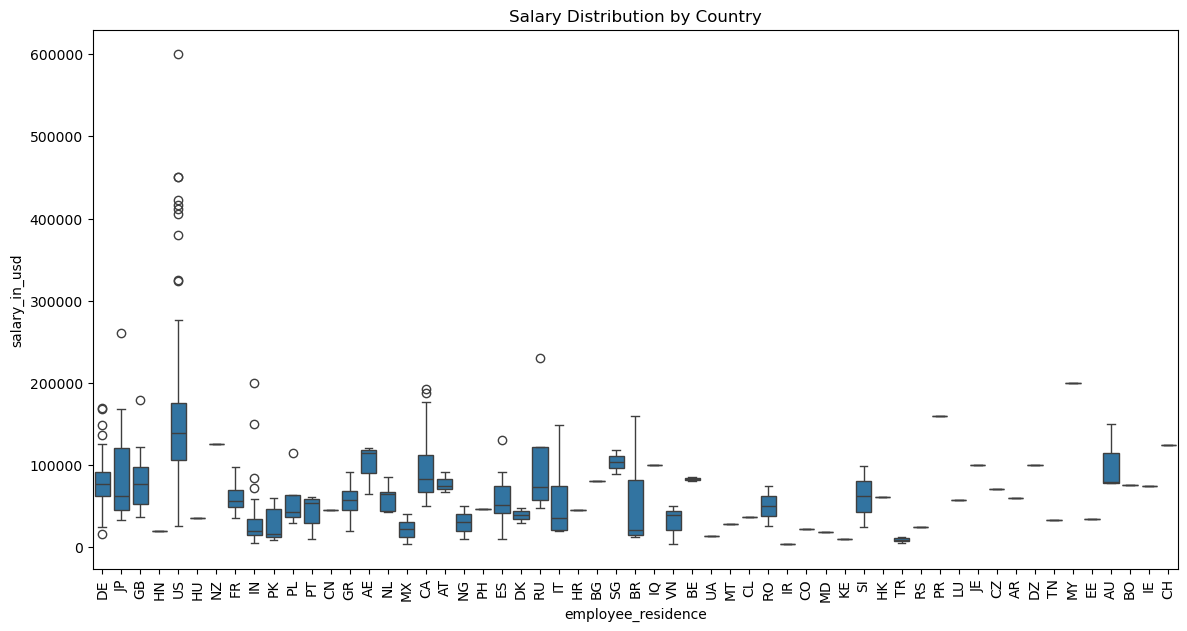

In [33]:
# Box plot for salary by  (employee residence)
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='employee_residence', y='salary_in_usd')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Salary Distribution by Country')
plt.show()

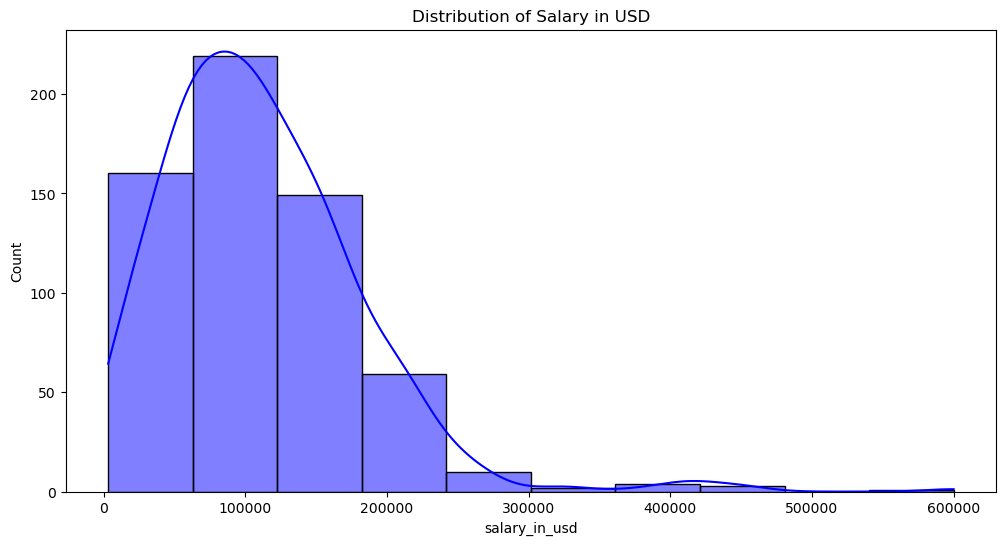

In [37]:
# Histograms of Salary Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue', bins=10)
plt.title('Distribution of Salary in USD')
plt.show()

**observation**
- in the above bar its showing for salary_in_usd not for salary_in_usd_sqrt we are performing operation on salary_in_usd
- showing data is right skewed


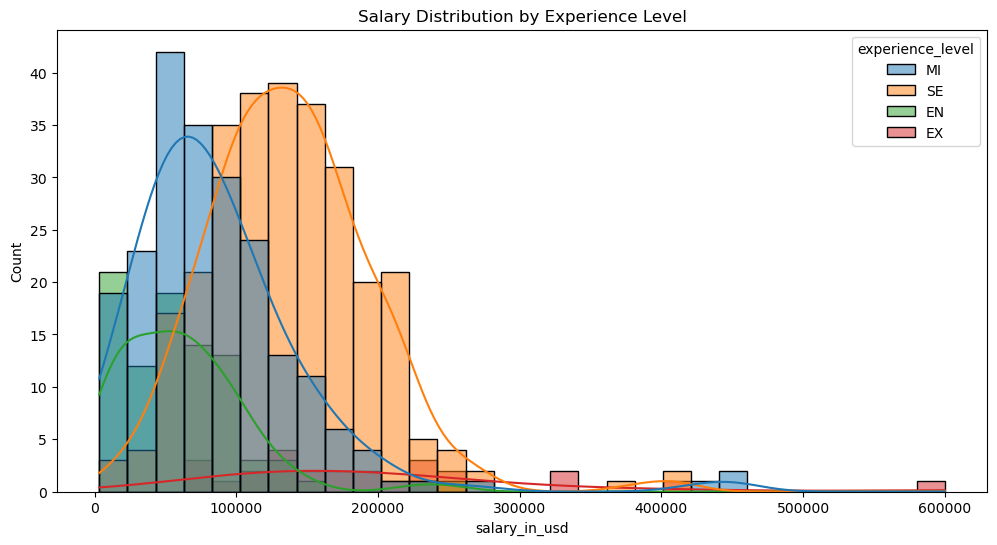

In [40]:
# Histogram for transformed salary_in_usd (sqrt) by experience level
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_in_usd', hue='experience_level', kde=True, bins=30)
plt.title('Salary Distribution by Experience Level')
plt.show()


In [47]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79800.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000.0,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,108800.0,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000.0,US,100,US,M
603,2022,SE,FT,Data Engineer,126000.0,US,100,US,M
604,2022,SE,FT,Data Analyst,129000.0,US,0,US,M
605,2022,SE,FT,Data Analyst,150000.0,US,100,US,M
